In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [ ]:
raw_data=pd.read_csv("1.04. Real-life example.csv")
raw_data.head()

# Preprocessing

In [ ]:
raw_data.describe(include='all')

In [ ]:
data=raw_data.drop(['Model'],axis=1) #axis=0 for rows,1 for cols
data.describe(include='all')

In [ ]:
data.isnull().sum()

In [ ]:
#rule of thumb
#if removing <5% of the obs,you are free to just remove all that have missing values


In [ ]:
#adhock method
data_no_mv=data.dropna(axis=0)

In [ ]:
data_no_mv.describe(include='all')

In [ ]:
sns.distplot(data_no_mv['Price'])

# dealing with outliers

In [ ]:
q=data_no_mv['Price'].quantile(0.99) #actually a value
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

In [ ]:
sns.distplot(data_1['Price'])

In [ ]:
sns.distplot(data_no_mv['Mileage'])

In [ ]:
q=data_no_mv['Mileage'].quantile(0.99) #actually a value
data_2=data_no_mv[data_no_mv['Mileage']<q]

In [ ]:
sns.distplot(data_2['Mileage'])

In [ ]:
q=data_1['Mileage'].quantile(0.99) #actually a value
data_2=data_1[data_1['Mileage']<q]

In [ ]:
sns.distplot(data_2['Mileage'])

In [ ]:
sns.distplot(data_no_mv['EngineV'])

In [ ]:
data_3=data_2[data_2['EngineV']<6.5]

In [ ]:
sns.distplot(data_3['EngineV'])

In [ ]:
sns.distplot(data_no_mv['Year'])

In [ ]:
q=data_3['Year'].quantile(0.01) #actually a value
data_4=data_3[data_3['Year']>q]

In [ ]:
sns.distplot(data_4['Year'])

In [ ]:
data_cleaned=data_4.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include='all')

In [ ]:
raw_data.describe(include='all')

# checking OLS assumptions

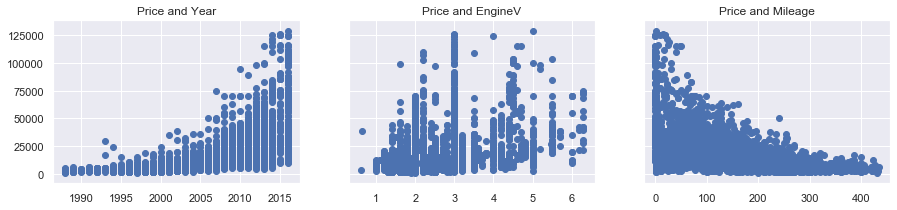

In [30]:
f,(ax1,ax2,ax3)=plt.subplots(1, 3 ,sharey=True ,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

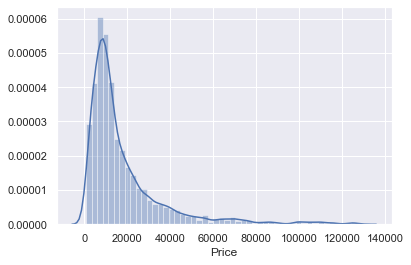

In [31]:
sns.distplot(data_cleaned['Price'])

In [32]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


#logtransformation

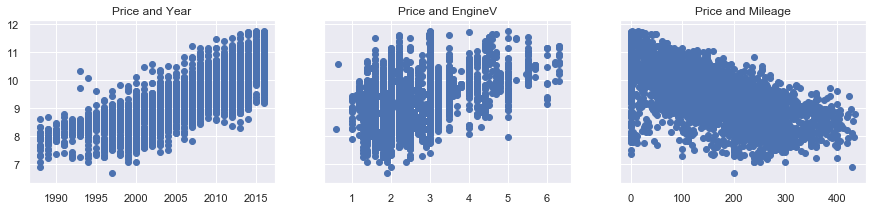

In [34]:
f,(ax1,ax2,ax3)=plt.subplots(1, 3 ,sharey=True ,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [35]:
data_cleaned= data_cleaned.drop(['Price'], axis=1) #no longer needed

# Multicollinearity

In [36]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [39]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [40]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)